<a href="https://colab.research.google.com/github/Semanti20/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import re
import string

In [ ]:
df_fake = pd.read_csv("/content/Fake.csv")


In [ ]:
df_true = pd.read_csv("/content/True.csv")

In [ ]:
df_fake.shape

(23481, 4)

In [ ]:
df_true.shape

(21417, 4)

In [ ]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data = pd.concat([df_fake, df_true]).reset_index(drop = True)
data.shape

(44898, 4)

In [ ]:
df_fake["class"]=0
df_true["class"]=1


In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape


((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-15-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-15-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_fake_manual_testing.head(10)


,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)


,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

**MERGING** **THE** **DATASETS**

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)


In [ ]:
df.isnull().sum()


text     0
class    0
dtype: int64

In [ ]:
df = df.sample(frac = 1)


In [ ]:
df.head()


,text,class
18593,BEIJING (Reuters) - The United States said on ...,1
10388,(Reuters) - U.S. Republican presidential candi...,1
12949,BEIRUT (Reuters) - Iran seriously condemns t...,1
23348,Tune in to the Alternate Current Radio Network...,0
5703,BEIJING (Reuters) - China said on Friday it re...,1


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,BEIJING (Reuters) - The United States said on ...,1
1,(Reuters) - U.S. Republican presidential candi...,1
2,BEIRUT (Reuters) - Iran seriously condemns t...,1
3,Tune in to the Alternate Current Radio Network...,0
4,BEIJING (Reuters) - China said on Friday it re...,1


**FUNCTIONS TO PROCESS THE TEXTS**

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

In [ ]:
x = df["text"]
y = df["class"]

**TRAIN TEST SPLIT**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


**TEXT TO VECTOR**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**DECISION** **TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)
print(classification_report(y_test, pred_dt))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5921
           1       1.00      1.00      1.00      5299

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



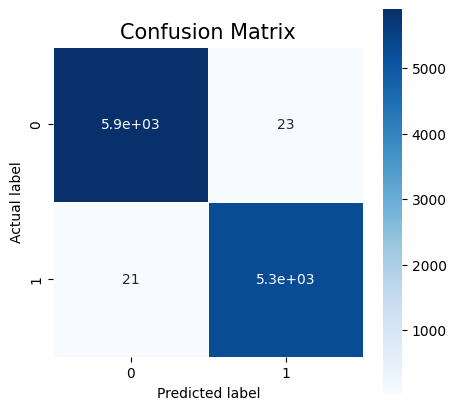

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_dt)
plt.figure(figsize = (5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True,square = True, cmap = "Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

**RANDOM** **FOREST**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(xv_train, y_train)
pred_rf = RF.predict(xv_test)
RF.score(xv_test, y_test)
print(classification_report(y_test, pred_rf))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5921
           1       0.99      0.99      0.99      5299

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



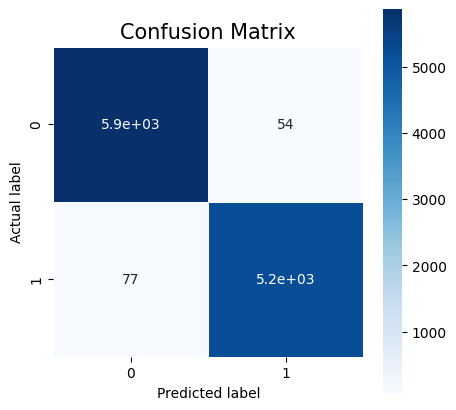

In [ ]:
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize = (5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True,square = True, cmap = "Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5921
           1       0.98      0.99      0.99      5299

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



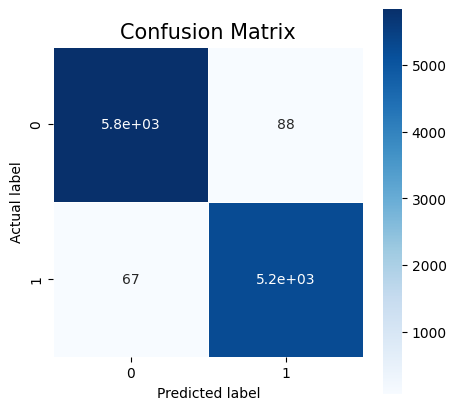

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize = (5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True,square = True, cmap = "Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

**MODEL** **COMPARISON**

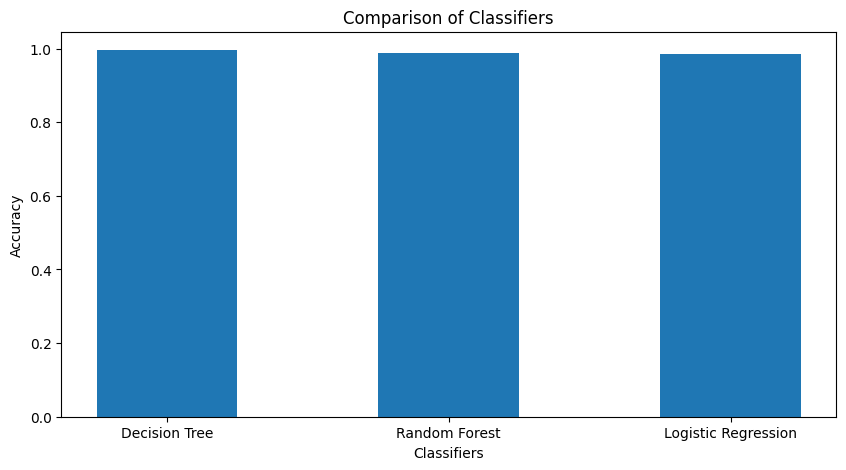

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.bar(["Decision Tree", "Random Forest", "Logistic Regression"], [DT.score(xv_test, y_test), RF.score(xv_test, y_test), LR.score(xv_test, y_test)], width = 0.5)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifiers")
plt.show()


**PREDICTING ALGORITHM WHICH GIVES BEST ACCURACY**

In [ ]:
max_accuracy = max(DT.score(xv_test, y_test), RF.score(xv_test, y_test), LR.score(xv_test, y_test))
if max_accuracy == DT.score(xv_test, y_test):
    print("Decision Tree gives the best accuracy of", max_accuracy)
elif max_accuracy == RF.score(xv_test, y_test):
    print("Random Forest gives the best accuracy of", max_accuracy)
else:
    print("Logistic Regression gives the best accuracy of", max_accuracy)


Decision Tree gives the best accuracy of 0.996078431372549


**TAKING INPUT USING DECISION TREE**

In [ ]:
def take_input():
  text = input("Enter the news: ")
  text = wordopt(text)
  xv_input = vectorization.transform([text])
  pred_input = DT.predict(xv_input)
  if pred_input[0] == 0:
    print("The news is Fake")
  else:
    print("The news is True")

take_input()
print("The accuracy of the news using decision tree is:", DT.score(xv_test, y_test))


Enter the news:  WATCH: FOX and FRIENDS Host BRIAN KILMEADE Immediately Makes WHOOPI Regret Telling Him To “Read A Book”
The news is Fake
The accuracy of the news using decision tree is: 0.996078431372549


**TAKING INPUT USING RANDOM FOREST**

In [ ]:
def take_input():
  text = input("Enter the news article: ")
  text = wordopt(text)
  xv_input = vectorization.transform([text])
  pred = RF.predict(xv_input)
  if pred[0] == 0:
    print("Fake News")
  else:
    print("True News")

take_input()

print("Accuracy of the news using Random Forest:", RF.score(xv_test, y_test))


Enter the news article: WATCH: FOX and FRIENDS Host BRIAN KILMEADE Immediately Makes WHOOPI Regret Telling Him To “Read A Book”
Fake News
Accuracy of the news using Random Forest: 0.9883244206773618


**TAKING INPUT USING LOGISTIC REGRESSION**

In [ ]:
def take_input():
  text = input("Enter the news article: ")
  text = wordopt(text)
  xv_input = vectorization.transform([text])
  pred = LR.predict(xv_input)
  if pred[0] == 0:
    print("Fake News")
  else:
    print("True News")

  print("Accuracy:", LR.score(xv_test, y_test))

take_input()


Enter the news article: WATCH: FOX and FRIENDS Host BRIAN KILMEADE Immediately Makes WHOOPI Regret Telling Him To “Read A Book”
Fake News
Accuracy: 0.9861853832442068
